# Instructions
<hr>

## 1. install YOLO v5

In [1]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


## 2. install requirements.txt

In [6]:
!pip install -r ./yolov5/requirements.txt

                                              0.0/7.6 MB ? eta -:--:--
     -                                        0.4/7.6 MB 11.2 MB/s eta 0:00:01
     ----                                     0.9/7.6 MB 11.7 MB/s eta 0:00:01
     -------                                  1.5/7.6 MB 11.6 MB/s eta 0:00:01
     ----------                               2.0/7.6 MB 11.6 MB/s eta 0:00:01
     -------------                            2.5/7.6 MB 11.6 MB/s eta 0:00:01
     ----------------                         3.1/7.6 MB 11.7 MB/s eta 0:00:01
     -------------------                      3.6/7.6 MB 11.7 MB/s eta 0:00:01
     ----------------------                   4.2/7.6 MB 11.7 MB/s eta 0:00:01
     ------------------------                 4.7/7.6 MB 11.7 MB/s eta 0:00:01
     ---------------------------              5.3/7.6 MB 11.7 MB/s eta 0:00:01
     ------------------------------           5.8/7.6 MB 11.6 MB/s eta 0:00:01
     ---------------------------------        6.4/7.6 MB 11.

In [ ]:
!dir

In [ ]:
!type hijab.yaml

In [1]:
import yaml

with open('hijab.yaml', 'r') as f:
  data = yaml.full_load(f)

print(data)

data['train'] = '../hijab/images/train/'
data['val'] = '../hijab/images/val/'

with open('hijab.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['burqz', 'chador', 'mask', 'niqab'], 'nc': 4, 'train': '../hijab/images/train/', 'val': '../hijab/images/val/'}
{'names': ['burqz', 'chador', 'mask', 'niqab'], 'nc': 4, 'train': '../hijab/images/train/', 'val': '../hijab/images/val/'}


In [3]:
import torch
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print(device)
print(torch.cuda.get_device_name(0)) #-> get graphic card name

cuda:0
NVIDIA GeForce RTX 4080


In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# **2.Model Training**
* data : About data yaml file directory
* weights : Pre-Trained Model file directory (.pt), If you enter nothing model training with random weight value
* epochs : epoch 
* batch : batch_size
* cfg: example
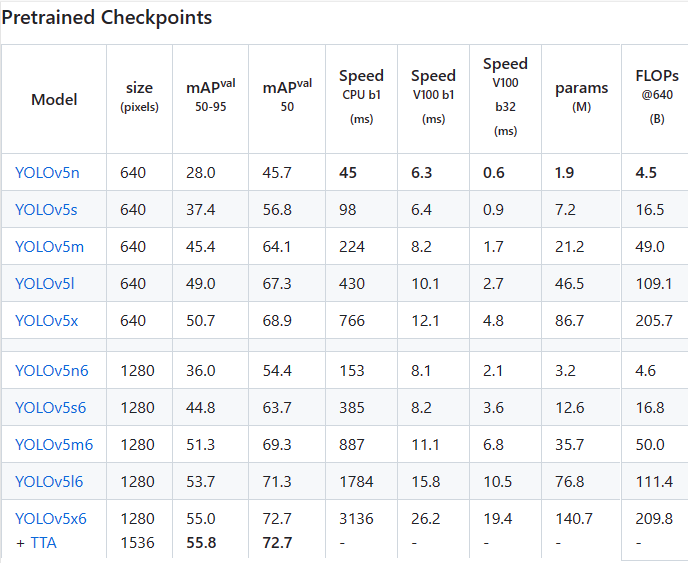

In [7]:
# epochs 50
!python ./yolov5/train.py --img 640 --batch 16 --epochs 50 --data hijab.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name hijab_yolov5s_results

train: weights=yolov5s.pt, cfg=./yolov5/models/yolov5s.yaml, data=hijab.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=hijab_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 5 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-187-g0004c74 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1,

In [ ]:
# epochs 100
from tqdm import tqdm
!python ./yolov5/train.py --img 640 --batch 16 --epochs 100 --data hijab.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name hijab_yolov5s_results2

The trained model is saved in the directory specified by --name in the format ./yolov5/runs/. In this exercise, it is saved in the directory ./yolov5/runs/train/hijab_yolov5s_results/. You can visualize the training results by accessing the results.png file in that path.

### Viewing training results with TensorBoard

In [3]:
%load_ext tensorboard
%tensorboard --logdir ./yolov5/runs/

Reusing TensorBoard on port 6006 (pid 3496), started 5 days, 23:21:56 ago. (Use '!kill 3496' to kill it.)

# 3. **Model Validation**

The trained model weights are saved in /content/yolov5/runs/train/hijab_yolov5s_results/weights/best.pt, and they are used to validate the model.

In [2]:
!python ./yolov5/val.py --data ./hijab.yaml --weights ./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt

^C


The validation results are saved in /runs/val/exp/.

# 4. **Model Prediction**
* source : Test Image (or Folder) Directory
* weights : The path to the weight file (in .pt format) after training is complete.
* conf : conf_threshold value (0 ~ 1)


To draw bounding boxes, the class score should exceed the specified value. The results are saved in the runs/detect/exp directory. If you repeat the predictions, folders such as exp1, exp2, exp3, etc., will be created in the runs/detect directory, and the results will be recorded in those folders.

In [3]:
from glob import glob
test_img_list = glob('./hijab/images/test/**/*.jpeg', recursive=True)
test_img_list2 = glob('./hijab/images/test/**/*.jpg', recursive=True)
print("length:", len(test_img_list), len(test_img_list2))
print(test_img_list)
print(test_img_list2)

test_dataset = test_img_list + test_img_list2
print(len(test_dataset))

length: 0 0
[]
[]
0


In [4]:
import os
from IPython.display import Image

In [5]:
val_img_path = test_dataset[30]
!python ./yolov5/detect.py --weights ./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt --source "{val_img_path}"
Image(os.path.join('./yolov5/runs/detect/exp/', os.path.basename(val_img_path)))

IndexError: list index out of range

In [ ]:
val_img_path = test_dataset[14]
!python ./yolov5/detect.py --weights ./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt --source "{val_img_path}"
Image(os.path.join('./yolov5/runs/detect/exp2/', os.path.basename(val_img_path)))